
<div class="alert alert-block alert-info">
   <h2 align="center"> <center><b> Reinforcement Learning Project - Sanding Task </b></center></h2>

<br>
<center><font size="3">This notebook is part of the teaching materials for ELEC-E8125</font></center>
<center><font size="3">Sep 4, 2023 - Nov 30, 2023</font></center>
<center><font size="3">Aalto University</font></center>
</div>


<a id='TOC'></a>

<div class="alert alert-block alert-success">
    
# Table of contents
* <a href='#1.'> 1. Learning Objectives</a>
* <a href='#2.'> 2. Introduction </a>
* <a href='#3.'> 3. Sanding Task </a>
* <a href='#4.'> 4. Code Structure and Files </a>
* <a href='#5.'> 5. Tasks </a>
* <a href='#6.'> 6. Implementation requirements </a>
* <a href='#7.'> 7. Evaluation / grading </a>
* <a href='#8.'> 8. Start the project </a>
* <a href='#9'> 9. Submission </a>
* <a href='#10'> 10. Feedback  </a>

<a href='#T1'><b>Student Task 1.</b> Implement the basic PPO or DDPG algorithm. Create a new file called either 'ddpg.py' or 'ppo.py' in the folder 'algos'. Run the algorithm in all three sanding environments. Report the results, that is, training plots and test performances. (30 points)</a>

<a href='#T2'><b>Student Task 2.</b> Extend DDPG/PPO to improve the performance based on the hints in Section 5. Note the instructions on the extensions in Section 5. Create a new file called either 'ddpg_extension.py' or 'ppo_extension.py' in folder 'algos'. Do the following: 1. The base algorithm's performance must be improved such that the agent succeeds in the moderate difficulty environment. Report the results (training plot and test performance) for all three environments; 2. Follow the provided structure such that it can be tested with function 'test(agent)'; 3. If you implemented multiple extensions analyze the difference in performance between the extensions . (40 points)</a>

<a href='#Q1'><b>Student Question 1.</b> Explain how you extended PPO/DDPG and why in a maximum of 200 words. In addition, explain briefly in which parts of the source code the changes are (refer to file name and function names or lines of code). (30 points) </a>

<a href='#T3'><b>Student Task 3.</b> This task gives bonus points to the project works that get highest performance in the difficult sanding environment. At the end of the course, we will use everyone's improved agent (please submit your pretrained weights) to run the competition on the most difficult sanding environment. Competitive grading: all projects are evaluated in the difficult environment for performance and put into ranking order. Top 10% of submitted projects get bonus points. Best performing project (100% ranked) gets 20 bonus points, 95% ranked gets 10 bonus points, 90% or lower ranked gets 0 bonus points. (+20 points) </a>

**Total Points:** 100 (+20)

<div style="background-color:lightcoral; padding:10px; border-radius:5px">

# <span style="color:white">0. Group Information (IMPORTANT)</span>

## <span style="color:white">Please read the instructions and fill in your group information</span>

- This project work is intended to be completed in groups of 2 students, who will share the same grade. If you are looking for a project partner, please join the project channel on Zulip and introduce yourself. 

- However, it is also acceptable to complete the project individually. 

- **Only one student** from each group should submit the project.

- Please provide the **NAME (First Name Last Name)**, **Aalto Student ID**, and **Aalto User Name** of each group member. For example:
    - Member 0: Jane Doe, 123456, janed5

</div>


<div style="background-color:lightcoral; padding:10px; border-radius:5px; margin-bottom: 10px">

# <span style="color:white">### TODO: Fill in Your Group Information HERE</span>

DOUBLE CLICK TO EDIT
- **Member 1:**
  - Name: Mehdi Moshtaghi
  - Aalto Student ID: 101395821
  - Aalto User Name: moshtam2

- **Member 2 (if applicable):**
  - Name:
  - Aalto Student ID:
  - Aalto User Name:

</div>


# 1. Learning Objectives <a id='1.'></a>
In the project work, students move to a more independent working style compared with the exercises. In the exercises, instructions and template code for reinforcement learning algorithms was provided. However, in the project work the students are given **a new task** that they need to solve using reinforcement learning methods discussed during the course and others. The students need to decide which method they will use (either PPO or DDPG), extend the method, and explain why. Students may take advantage of code that they have already developed in the exercises or which was part of the exercises.

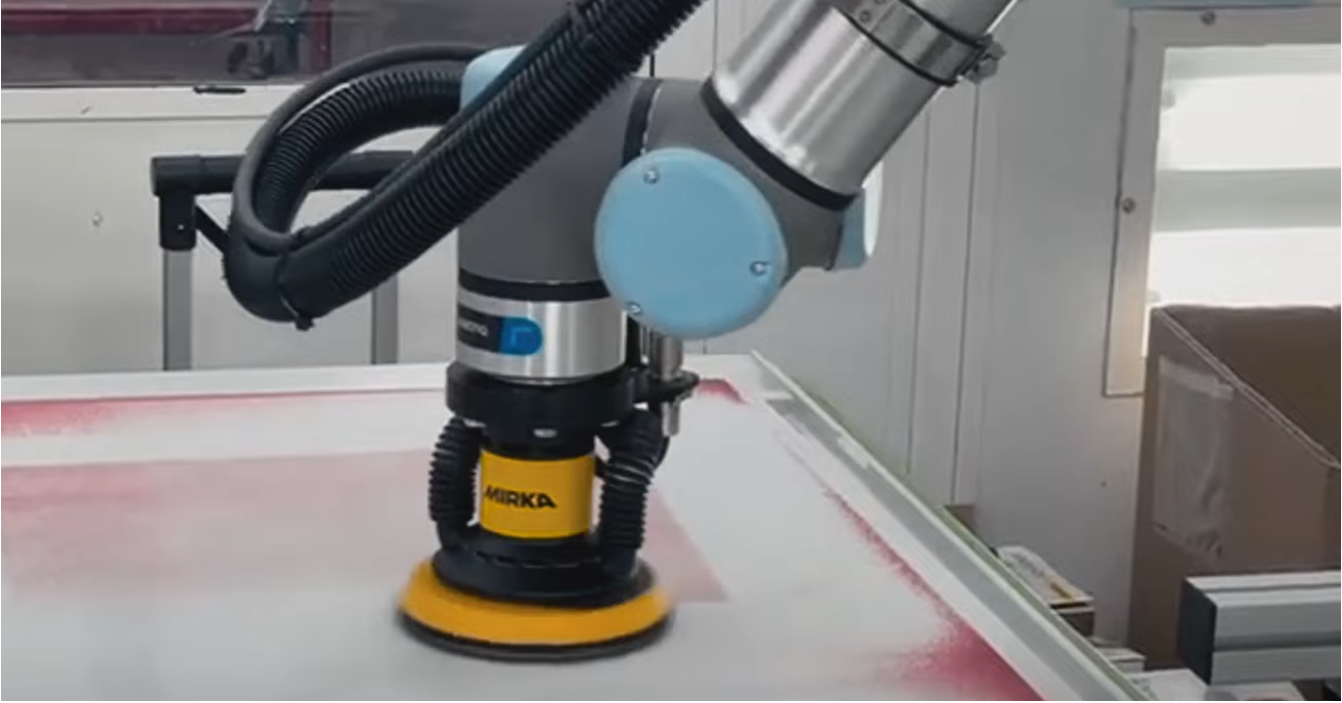
# 2. Introduction <a id='2.'></a>

The goal of the project work is to optimize the behavior of a sanding robot using reinforcement learning such that the robot avoids already painted areas but sands areas that need sanding. We give now a general motivation and task description. [Section 3](#3-task-definition) provides a more detailed task definition.

<center>
<figure style="display: inline-block; text-align: center; margin: 10px;">
  <img src="imgs/robot_sanding.png" width="width:40%"/>
</figure>
</center>
<center>Figure 1: Illustration of a robot sanding a planar area. Image source: (https://www.youtube.com/watch?v=TG-3NZzoZiM)</center>

The robot operates on a 2-D plane and should hit a set of "sanding areas" using the sanding tool equipped. At the same time the robot has to avoid specific "painted areas" which are also defined as part of the system state. The sanding areas and painted areas are defined as part of the state space. The robot gets a negative reward for hitting painted areas and a positive reward for sanding sanding areas.

The idea is to optimize the behavior of the robot using reinforcement learning based on either the PPO or DDPG algorithm. You should extend PPO or DDPG such that you get higher performance in the more challenging versions of the sanding task. When answering questions and documenting source code the important thing is to clearly state which kind of methods and techniques you have used and especially **why** you have used those.

[Section 3](#3-task-definition) defines the sanding task. [Section 4](#4-code-structure--files-a-id4a) shows the structure of the provided file directory. [Section 5](#5-requirements-possible-extensions-and-hints-a-id5a) discusses the **mandatory project requirements** and **possible extensions** to the basic PPO and DDPG algorithms. [Section 6](#6-evaluation--grading-a-id7a) describes how the project is evaluated and graded. In [Section 7](#7-source-code-a--7a), you will add your implementation, perform the tasks and answer questions. 
In [Section 8](#8-feedback-a-id8a), you can provide feedback on the project work. The feedback is important since this is the first year this project work is used on the course.

Note that if you have a plan for the project work but are unsure whether the plan satisfies the project work requirements, ask the teaching assistants for advice on Zulip.

# 3. Sanding Task <a id='3.'></a>
The primary objective in this project is to optimize a sanding robot's behavior, aiming to maximize the expected cumulative reward $ J(\theta) = \mathbb{E}_{\pi_{\theta}}\left[ \sum_{t=0}^{\infty} \gamma^t r_t \right] $. The simulator for the sanding task is provided in the "sanding.py" Python file. This section defines the sanding task. Please, see below.

## 3.1. Markov Decision Process (MDP)
- **Robot Characteristics**: The robot is visualized as a <span style="color:purple">purple</span> circle with a radius of 10, operating on a 2D plane. The x and y coordinates range from -50 to 50.
- **Sanding & No-Sanding Areas**: There are sanding (<span style="color:green">green</span>) and no-sanding (<span style="color:red">red</span>) areas, each with a radius of 10. Their configurations vary based on the task.
  
### 3.1.1. State Representation
A state \( s \) is defined as:

$s = [(x_{\text{ROBOT}}, y_{\text{ROBOT}}), (x_{\text{SAND}}, y_{\text{SAND}})_1, \dots,
    (x_{\text{SAND}}, y_{\text{SAND}})_N, (x_{\text{NOSAND}}, y_{\text{NOSAND}})_1, \dots,
    (x_{\text{NOSAND}}, y_{\text{NOSAND}})_M)]$

- $N$ is the number of sanding areas (circles)
- $M$ is the number of no-sanding areas (circles) 
- $(x_{\text{ROBOT}}, y_{\text{ROBOT}})$ : Robot's current location
- $(x_{\text{SAND}}, y_{\text{SAND}})_i$: Location of the $i$th sanding area
- $(x_{\text{NOSAND}}, y_{\text{NOSAND}})_j$: Location of the $j$th no-sanding area

### 3.1.2. Action Space

An action $a$ consists of target coordinates for the robot:

$a = (a_x, a_y) \in \mathbb{R}^2$

$a_x, a_y$ selects the current target coordinates of the robot arm. A PD-controller~\cite{X} trys to move the robot arm from the current coordinates $(x_{\text{ROBOT}}, y_{\text{ROBOT}})$ to the target coordinates $a_x, a_y$. You do not need to necessarily understand how exactly the PD-controller works but the controller may not always move the robot to the correct coordinates in one time step, and, it may also overshoot the target location. Please, see below for a visualization of this behavior.


### 3.1.3. Reward definition

The reward is defined as the number of sanding locations the robot touches minus the number of no-sanding locations the robot touches, that is,
$r_t = $ number of sanded sanding locations - number of sanded no-sanding locations . 

The robot can only sand a sanding or no-sanding location once. All sanding and no-sanding locations that are touched by the robot will be moved outside the operating area, that is, those locations will be outside the operating area in the subsequent time step. 


## 3.2 Scenarios with different difficulty levels: <a id='3.1'></a>


### Environment Breakdown
#### Environment 1: Easy Environment 

<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/easy_env.gif" alt="Easy Environment" width="180"/>
  </figure>
</p>

- **No-Sanding Spots**: 1 (<span style="color:red">red</span>)
- **Sanding Spots**: 1 (<span style="color:green">green</span>)
- **PD Control**: Movement to target \((a_x, a_y)\) with random number of PD iterations
- **Notes**: Hollow circle indicates target, <span style="color:purple">purple</span> circle is the robot

#### Environment 2: Moderate Difficulty Environment 
<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/middle_env.gif" alt="Easy Environment" width="180"/>
  </figure>
</p>

- **No-Sanding Spots**: 2 (<span style="color:red">red</span>)
- **Sanding Spots**: 2 (<span style="color:green">green</span>)
- **Control**: Movement to target \((a_x, a_y)\) with random number of PD iterations
- **Notes**: Hollow circle indicates target, <span style="color:purple">purple</span> circle is the robot

#### Environment 3: Difficult Environment 
<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/difficult_env.gif" alt="Easy Environment" width="180"/>
  </figure>
</p>
- **No-Sanding Spots**: 4 (<span style="color:red">red</span>)
- **Sanding Spots**: 4 (<span style="color:green">green</span>)
- **Control**: Movement to target \((a_x, a_y)\) with random number of PD iterations
- **Notes**: Hollow circle indicates target, <span style="color:purple">purple</span> circle is the robot





# 4 Code Structure & Files <a id='4.'></a>

```project.ipynb``` is the main file needed to be modified for this project, but you can also add other auxiliary files if needed.  
```
├───cfg
│   ├───algo                       # Algorithm configurations
│   │   ├───ddpg.yaml
│   │   └───ppo.yaml
│   │   ├───ddpg_extension.yaml
│   │   └───ppo_extension.yaml
│   ├───envs                       # Environment configurations
│   │   ├───difficult_env.yaml 
│   │   ├───easy_env.yaml
│   │   ├───env_example.py         # A python example of how to utilize the environment
│   │   └───middle_env.yaml
├───imgs
│   ├───difficult_env.gif
│   ├───easy_env.gif
│   ├───middle_env.gif
│   ├───robot_sanding.pdf
│   └───robot_sanding.png
├───utils
│   ├───common_utils.py
│   └───recorder.py
├───algo
│   ├───ddpg.py
│   └───ppo.py
│   ├───ddpg_extension.py
│   └───ppo_extension.py
├───project.ipynb
└───sanding.py

```

## 4.1 Execution time <a id='4.1'></a>

The training of DDPG/PPO may take more than 30 min depending on the server load. If you have problems with the training time, you can train DDPG/PPO locally on your computer or a server.

# 5. Tasks <a id='5.'></a>

## I. Tasks 1: use following algorithms to solve the robot sanding task. 
  - **PPO** (you can take code from ex1 as a basis)
  - **DDPG** (you can take code from ex6 as a basis)

Implementations from the exercises can be used and extended, otherwise please implement algorithms yourself. For learning purposes, you can look at existing implementations on the Internet.

- We do not want to focus on hyperparameter or neural network architecture tuning. Therefore, use the following choices:
  - For PPO, use the neural network policy configuration found in exercise 1 code.
  - For DDPG, use the neural network policy and value function configuration found in exercise 6 code.
  - <span style="color:red">We provide the hyper-parameters in configuration files 'cfg/algo/*', DO NOT change the parameters there</span>

- **No copying of code! Code should be original, written by yourself or taken from the exercises.**

- You should extend or modify your basic PPO/DDPG algorithm. Below possible extensions are described but you can also come up with your own ones. For each modification or extension, describe in exactly two sentences the extension and refer to where the modifications can be found in the code (for example, file name and function name or line numbers).

- More detailed instructions are given in the following sections. If you are not sure what you are allowed or not allowed to do, contact the TAs, preferably on Zulip so that also others may learn from the question.

**Note: not following the requirements may lead to point deduction or rejection of the project work.**

## II. Task 2: possible extensions to improve perfromance

After the basic PPO/DDPG implementation, you shall try to do some technical improvements to improve the agent's performance. Below we list several possible extensions you can apply to improve the perfromance. 

**Note 1**: some of the suggested extensions require more effort than others. If you implement some of the "easier" extensions that require less effort than others such as "Driving during training the log standard deviation of each dimension of the Gaussian policy from the original value to zero", please implement multiple extensions.

**Note 2**: You can also propose your found improvements, but you should also give the references.

#### PPO
- **Exploration**: Crucial in policy gradient methods. Options include:
  - During training, linearly decrease the log standard deviation of each dimension of the Gaussian policy from the original value to zero.
  - During training, linearly decrease the standard deviation of each dimension of the Gaussian policy from the original value to a small value.
  - Adding an entropy bonus to the policy loss or reward function. The strength of the entropy bonus is typically controlled by a parameter $\alpha$. To select $\alpha$, you can, for example:
    - Keep $\alpha$ constant.
    - Employ a schedule for $\alpha$, for example, drive it from a high value (high exploration) to a low one (high exploitation) during training.
    - Employ a schedule for a target entropy.
- **Implementation Techniques**: Several techniques can impact PPO's performance, such as value normalization.
- **Further Reading**:
  1. [The 37 Implementation Details of Proximal Policy Optimization (Shengyi et al., 2022)](https://iclr-blog-track.github.io/2022/03/25/ppo-implementation-details/)
  2. [What Matters In On-Policy Reinforcement Learning? A Large-Scale Empirical Study (Andrychowicz et al., 2020)](https://arxiv.org/abs/2006.05990)

#### DDPG
- **Mitigating Value Overestimation**: 
  - Consider the Twin Delayed DDPG (TD3) algorithm to address overestimation bias and training instability. ([Fujimoto et al., 2018](https://arxiv.org/abs/1802.09477))
- **Utilizing Distributional Critics**: 
  - Focus on the entire distribution of value functions for enhanced performance and stability.
  - **QR-DDPG**: Provides robust value estimates through quantile regression. ([Dabney et al., 2018](https://www.aaai.org/ocs/index.php/AAAI/AAAI18/paper/view/17184))
  - **D4PG**: Combines Distributional Value Functions, Off-Policy Training, and Actor-Critic Methods.
  - **IQN for DDPG**: Extends DDPG by representing the full quantile function for the value distribution. ([Dabney et al., 2018](http://proceedings.mlr.press/v80/dabney18a.html))
  - **FQF**: Enhances distributional RL by learning both quantile values and their fractions. ([Yang et al., 2019](https://papers.nips.cc/paper/2019/hash/8fb134e0e6d44a4f95a8bb2d5b2cb1c4-Abstract.html))
- **Enhancing Exploration**: 
  - Explore efficiently and avoid suboptimal solutions with strategies like:
    - **Ornstein-Uhlenbeck Process**: Generates correlated noise, helpful in control tasks with inertia.
    - **Intrinsic Curiosity Module (ICM)**: Encourages exploration through self-supervised prediction. ([Pathak et al., 2017](https://openaccess.thecvf.com/content_cvpr_2017_workshops/w13/html/Pathak_Curiosity-Driven_Exploration_by_CVPR_2017_paper.html))
    - **Random Network Distillation (RND)**: Generates intrinsic rewards based on prediction errors. ([Burda et al., 2018](https://arxiv.org/abs/1810.12894))
    - *Additional Strategies*: Feel free to explore other methods.

#### Model-Based RL
- To improve the basic PPO or DDPG algorithm, you can integrate model learning ([Model-based RL survey](https://arxiv.org/abs/2206.09328)) into the training process, that is, learning a dynamics and reward model.
  - **More data**: With a learned model you can generate more data (the 200k sample limit applies only to samples generated using the sanding simulator, not to samples generated using learned models).
  - **Planning and Acting**: Combine planning with learning for more informed decisions. You can use, for example, the cross entropy method (CEM) introduced during the course for planning with the learned model.

## III. Hints & Tips

### a) Hints
- Consider the sanding area's dimensions of 100 units in both width and height when sampling x, y coordinates.
- Due to the multidimensional actions, when using a Gaussian policy, remember to use a multivariate Gaussian probability distribution, or, product of standard Gaussian distributions that corresponds to a multivariate Gaussian distribution with a diagonal covariance matrix.

### b) Debugging Tips
- To debug with a fixed seed, set `reset(seed=fixed_seed)` when resetting the environment each episode. This ensures a consistent initial position, making the task easier to learn. By default, training uses random seeds, and policies are evaluated likewise. Leaving `reset()` empty defaults to random seeds.


# <span style="color:red">6. Implementation requirements </span> <a id='6.'></a>

### <span style="color:red">Your implemented algorithm must be compatible with the below requirements; otherwise, the code will be considered invalid.</span>

## I. Data Saving Format

### a) Training Logs: 
During the training, your code shall create a CSV file as the training log.

  - This log should output a CSV file with the following format:
    ```
    ,episode_length,ep_reward,episodes,total_step,average_return
    0,20,0.0,99,2000,-0.13
    1,20,0.0,199,4000,0.02
    ...
    ```
  - The training log should be saved as:
    `results/<environment name>/<algorithm name>/logging/logs_<seed number>.csv`
    
    For example:
    `results/SandingEnvDifficult/ddpg/logging/logs_0.csv`
    

### b) Model Weights

During/after training, the policy/critic weights should be saved in the path:

  `results/<environment name>/<algorithm name>/model/model_parameters_<seed number>.pt`
  
  For example:
  
  `results/SandingEnvDifficult/ddpg/model/model_parameters_0.pt`

### c) Videos: 

Training videos will automatically be saved under path `results/<environment name>/<algorithm name>/video/train`. Note that you do not need to implement this.



## II. Visualization Plot Functions

Ensure that your implemented algorithm is compatible with the functions located in `utils/common_utils.py`:

- **Single Training Curve**: 
  - Function: `plot_reward(path, seed, env_name)`
  - Description: Plots the training curve of a single algorithm, trained with a specific seed.
  
- **Multiple Training Curves**: 
  - Function: `plot_algorithm_training(path, seeds, env_name)`
  - Description: Plots the training curves of a single algorithm, trained with multiple specific random seeds.
  - Example: `seeds=[0,1,2]`
  
- **Comparison of Training Performances**: 
  - Function: `compare_algorithm_training(algo1, algo2, seeds)`
  - Description: Given two configured algorithms/agents, this function will generate comparison plots of their training performances.


## III. <span style="color:red"> Configurations </span>

We provide the hyperparameters in 'cfg/algo', use those configuration files to initialize your agent. Example refer to following code. You should not change any parameters there.

**Usage Example**:
```python
config = setup(algo='ppo', env='middle')
    config["seed"] = 0
    agent = PPOAgent(config)
```

## IV. <span style="color:red"> Training implementation </span>

To ensure compatibility with the setup function, your implemented algorithm must follow the specified protocol:

- **Function**: `setup(algo=None, env='easy', cfg_args={})`
  - **Purpose**: Used for setting up the configurations.
  - **Usage Example**:
    ```python
    config = setup(algo='ppo', env='middle')
    config["seed"] = 0
    agent = PPOAgent(config)
    agent.train()
    ```
  - **Parameters**:
    - `algo`: Specify the algorithm. Use either `'ppo'` or `'ddpg'`.
    - `env`: Specify the environment. Options include `'easy'`, `'middle'`, or `'difficult'`.

## V. <span style="color:red"> Test implementation </span>

To ensure compatibility with the setup function, your implemented algorithm must follow the specified protocol:

- **Function**: `test`
  - **Purpose**: Used for test the performance of the agent.
  - **Usage Example**:
    ```python
    test(agent, env_name='easy', algo_name='ddpg')
    ```

## VI. <span style="color:red"> Access </span>

You shoudl not modify any files in paths:
- 'cfg/'
- 'utils/'
- 'sanding.py'

## VI. <span style="color:red"> Other tips </span>

1. If you choose DDPG based on ex6, you should be careful with function 'get_action()'. You should not use 
```python
    if self.buffer_ptr < self.random_transition:
``` 
if you want to evluate the agent's performance when using:
```python
test(agent, env_name='easy', algo_name='ddpg')
```

2. The standard deviation of gaussian policy in PPO is crucial for performance.

### <span style="color:red">Your implemented algorithm must be compatible with the above requirements; otherwise, the code will be considered invalid.</span>


# 7. Evaluation / Grading <a id='7.'></a>

### Grading
The general evaluation and grading process will take into account the following aspects:

- In Tasks 1 and 2, the grading will be based on the performance comparison between the extended algorithms and their respective baselines. For Task 2 and Question 1, the grading will focus on the implemented extensions.
  - The PPO baseline is derived from the code used in Exercise 1, featuring a Gaussian policy with an isotropic covariance matrix. (For more details, please google "isotropic covariance matrix"). The log standard deviation of the policy is linearly scheduled from the initial log standard deviation to zero during the training.
  - The DDPG baseline originates from the code used in Exercise 6. The exploration noise added to the action follows a Gaussian distribution (mean is 0 and standard deviation is 0.3).

- In Question 1, the evaluation will consider the created extensions, including the description and explanation of the extensions, why those extensions were chosen, and the source code for the extensions.
- In Task 3, there will be a competitive grading approach: all projects will be evaluated based on their performance in the difficult Task 3 environment and then ranked. The top 10% of the submitted projects will receive bonus points. The best performing project (100% ranked) will receive 20 bonus points, 95% ranked will get 10 bonus points, and projects ranked 90% or lower will receive 0 bonus points.

### Baseline Performance:

#### For PPO:
- PPO (Easy Environment): mean: 0.63, standard deviation: 0.18
- PPO (Middle Environment): mean: 0.75, standard deviation: 0.32
- PPO (Difficult Environment): mean: 0.83, standard deviation: 0.41

#### For DDPG:
- DDPG (Easy Environment): mean: 0.73, standard deviation: 0.28
- DDPG (Middle Environment): mean: 0.81, standard deviation: 0.18
- DDPG (Difficult Environment): mean: 0.76, standard deviation: 0.25


# 8. Start the project <a id='8.'></a>

This section contains below all the source code including your implementation and the tasks and question that need to be filled. 


<div class=" alert alert-warning">
    <h3><b>Initialize the code</b> </h3>
    Run the following section to start the task. DO NOT MODIFY THE CODE
</div>

In [1]:
!pip install  imageio

In [2]:
import yaml
import gymnasium as gym

import numpy as np 
from types import SimpleNamespace as SN
from pathlib import Path
import copy
import utils.common_utils as cu
# from algos.ddpg_agent import DDPGAgent
from algos.ppo_agent import PPOAgent
from utils.recorder import RecordVideo

In [3]:

# Function to test a trained policy
def test(agent, env_name, algo_name):
    # Load model
    agent.load_model()
    print("Testing...")
    total_test_reward, total_test_len = 0, 0
    returns = []
    
    cur_dir=Path().cwd()
    cfg_path= cur_dir/'cfg'
    # read configuration parameters:
    cfg={'cfg_path': cfg_path, 'algo_name': algo_name}
    env_cfg=yaml.safe_load(open(cfg_path /'envs'/f'{env_name}_env.yaml', 'r'))
    
    # prepare folders to store results
    work_dir = cur_dir/'results'/env_cfg["env_name"]/algo_name
    video_test_dir=work_dir/"video"/"test"
    
    for ep in range(agent.cfg.test_episodes):
        frames = []
        seed = np.random.randint(low=1, high=1000)
        observation, _ = agent.env.reset(seed=seed)
        test_reward, test_len, done = 0, 0, False
        
        while not done and test_len < agent.cfg.max_episode_steps:
            action, _ = agent.get_action(observation, evaluation=True)
            observation, reward, done, truncated, info = agent.env.step(action.flatten())
            fs = agent.env.render()
            frames = frames+fs
            test_reward += reward
            test_len += 1
        total_test_reward += test_reward
        total_test_len += test_len
        returns.append(test_reward)
        
        if ep%100==0:
            cu.save_rgb_arrays_to_gif(frames, video_test_dir/('_seed_'+str(agent.seed)+'_ep_'+str(ep)+'.gif'))

    print(f"Average test reward over {len(returns)} episodes: {total_test_reward/agent.cfg.test_episodes},+- {np.std(np.array(returns))}; \
        Average episode length: {total_test_len/agent.cfg.test_episodes}")


In [4]:
# Setup: read the configurations and generate the environment.
def setup(algo=None, env='easy', cfg_args={}, render=True, train_episodes=None):
    # set the paths
    cur_dir=Path().cwd()
    cfg_path= cur_dir/'cfg'
    
    # read configuration parameters:
    cfg={'cfg_path': cfg_path, 'algo_name': algo}
    env_cfg=yaml.safe_load(open(cfg_path /'envs'/f'{env}_env.yaml', 'r'))
    algo_cfg=yaml.safe_load(open(cfg_path /'algo'/f'{algo}.yaml', 'r'))
    cfg.update(env_cfg)
    cfg.update(algo_cfg)
    cfg.update(cfg_args)
    
    # forcely change train_episodes
    if train_episodes is None:
        True
    else:
        cfg["train_episodes"] = train_episodes
    
    # prepare folders to store results
    work_dir = cur_dir/'results'/cfg["env_name"]/str(algo)
    model_dir=work_dir/"model"
    logging_dir=work_dir/"logging"
    video_train_dir=work_dir/"video"/"train"
    video_test_dir=work_dir/"video"/"test"
    for dir in [work_dir, model_dir, logging_dir, video_train_dir, video_test_dir]:
        cu.make_dir(dir)
        
    cfg.update({'work_dir':work_dir, "model_dir":model_dir, "logging_dir": logging_dir, "video_train_dir": video_train_dir, "video_test_dir": video_test_dir})
    cfg = SN(**cfg)
    
    # set seed
    if cfg.seed == None:
        seed = np.random.randint(low=1, high=1000)
    else:
        seed = cfg.seed
    
    ## Create environment
    env=cu.create_env(cfg_path /'envs'/f'{env}_env.yaml')

   
    if cfg.save_video:
        # During testing, save every episode
        if cfg.testing:
            ep_trigger = 1
            video_path = cfg.video_test_dir
        # During training, save every 50th episode
        else:
            ep_trigger = 1000   # Save video every 50 episodes
            video_path = cfg.video_train_dir
        
        if render:
            env = RecordVideo(
                env, video_path,
                episode_trigger=lambda x: x % ep_trigger == 0,
                name_prefix=cfg.exp_name)


    eval_env=copy.deepcopy(env)
    env.reset(seed=seed) # we only set the seed here. During training, we don't have to set the seed when performing reset().
    eval_env.reset(seed=seed+1000)
    eval_env=None # For simplicity, we don't evaluate the performance during training.
        
    # Get dimensionalities of actions and observations
    action_space_dim = cu.get_space_dim(env.action_space)
    observation_space_dim = cu.get_space_dim(env.observation_space)
    print(f'{action_space_dim=} , {observation_space_dim=}')
    config={
        "args": cfg,
        "env":env,
        "eval_env":eval_env,
        "action_space_dim": action_space_dim,
        "observation_space_dim": observation_space_dim,
        "seed":seed
    }
    return config


<a id='T1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1</b> (30 points) </h3> 
    Implement the basic PPO or DDPG algorithm. Create a new file called either 'ddpg.py' or 'ppo.py' in the folder 'algos'. Run the algorithm in all three environments. Report the results here (training plot and test performance).
</div>

## Task 1.1: Train each agents' performance 

- Implement your algorithm (either DDPG or PPO) in algo/ddpg.py or algo/ppo.py
- After the implementation, train your algorithm with the following code
    - Train the algorithm in all three environments
    - The code will train the algorithm with 3 random seeds
- Your code must be compatible with the following provided python code

**Below, you will find an example of how to test your code**

In [5]:
# import torch
# import torch.nn.functional as F
# from torch.distributions import Normal, Independent, MultivariateNormal
# loc = torch.tensor([[-10.0, -6.0],
#                     [-2.0, 2.0],
#                     [6.0, 10.0]]) # (bs, act_dim)
# scale = torch.tensor([0.5, 1.0]) # (act_dim)
# # assert scale.shape == torch.Size([2])
# # scale = scale.expand_as(loc) # (bs, act_dim)
# print(f'{scale=}')
# print(f'{torch.diag(scale)=}')
# mvn_dis = MultivariateNormal(loc, scale_tril=torch.diag(scale))
# print(f'{mvn_dis.sample()=}')
# print(f'{mvn_dis.log_prob(mvn_dis.sample())=}')
# normal_dis = Normal(loc, scale)
# print(f'{normal_dis.sample()=}')
# print(f'{normal_dis.log_prob(normal_dis.sample())=}')
# diagonal_dis = Independent(normal_dis, reinterpreted_batch_ndims=1)
# print(f'{diagonal_dis.sample()=}')
# print(f'{diagonal_dis.log_prob(diagonal_dis.sample())=}') # log prob of joint distribution of all dimensions
# # loc.flatten()

In [6]:
# This part is provided only for debugging

train_episodes = 1000  # Limit the number of training episode for a fast test

config=setup(algo='ppo', env='middle', train_episodes=train_episodes, render=False)

config["seed"] = 2 #43


if config["args"].algo_name == 'ppo':
    agent=PPOAgent(config)
elif config["args"].algo_name == 'ddpg':
    agent=DDPGAgent(config)
else:
    raise Exception('Please use ppo or ddpg!')

# Train the agent using the selected algorithm    
agent.train()


/opt/software/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/opt/software/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/opt/software/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/opt/software/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


action_space_dim=2 , observation_space_dim=10
Episode 99 Step 2000 finished. Average episode return: 0.0 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 199 Step 4000 finished. Average episode return: -0.02 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 299 Step 6000 finished. Average episode return: -0.09 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 399 Step 8000 finished. Average episode return: 0.06 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 499 Step 10000 finished. Average episode return: 0.01 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 599 Step 12000 finished. Average episode return: 0.16 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Epis

In [ ]:
test(agent, 'middle', 'ppo')

**If everything is fine, we start the proper training now**

In [14]:
## Code block for training and testing an agent using the implemented algorithm
## in the three different sanding environment versions with different difficulty levels
import itertools
# Choose either PPO or DDPG
implemented_algo ='ppo'#'ppo' or 'ddpg'

# Loop over the three difficulty levels
for environment, i in itertools.product(['easy', 'difficult'], range(3)):
# for environment, i in itertools.product(['middle'], range(3)):
# for environment in ['easy', 'middle', 'difficult']:
    print(f'\n------------------ {environment=} , seed={i} -------------------\n')
    training_seeds = []
    
    # Train the algorithm with a specific random seed.
    # In total, we train the algorithm with three random seeds [0, 1, 2].
    # for i in range(3):
    config=setup(algo=implemented_algo, env=environment)

    config["seed"] = i
    training_seeds.append(i)

    if config["args"].algo_name == 'ppo':
        agent=PPOAgent(config)
    elif config["args"].algo_name == 'ddpg':
        agent=DDPGAgent(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    # Train the agent using selected algorithm    
    agent.train()
    


------------------ environment='easy' , seed=0 -------------------

Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4
action_space_dim=2 , observation_space_dim=6


Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4
Episode 99 Step 2000 finished. Average episode return: -0.01 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 199 Step 4000 finished. Average episode return: 0.02 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 299 Step 6000 finished. Average episode return: 0.04 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 399 Step 8000 finished. Average episode return: 0.05 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 499 Step 10000 finished. Average episode return: -0.04 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 599 Step 12000 finished. Average episode return: 0.05 (20 episode_length, 

error: XDG_RUNTIME_DIR not set in the environment.


Episode 999 Step 20000 finished. Average episode return: 0.09 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-1000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-1000.mp4
Episode 1099 Step 22000 finished. Average episode return: 0.07 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1199 Step 24000 finished. Average episode return: 0.06 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1299 Step 26000 finished. Average episode return: 0.15 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1399 Step 28000 finished. Average episode return: 0.11 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1499 Step 30000 finished. Average episode return: 0.21 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1599 Step 32000 finished. Average episode return: 0.11 (20 epis

error: XDG_RUNTIME_DIR not set in the environment.


Episode 1999 Step 40000 finished. Average episode return: 0.27 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-2000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-2000.mp4
Updating the policy...
Updating finished!
Episode 2099 Step 42000 finished. Average episode return: 0.3 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2199 Step 44000 finished. Average episode return: 0.16 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2299 Step 46000 finished. Average episode return: 0.22 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2399 Step 48000 finished. Average episode return: 0.21 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2499 Step 50000 finished. Average episode return: 0.26 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2599 Step 52000 finish

error: XDG_RUNTIME_DIR not set in the environment.


Episode 2999 Step 60000 finished. Average episode return: 0.34 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-3000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-3000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-3000.mp4
Updating the policy...
Updating finished!
Episode 3099 Step 62000 finished. Average episode return: 0.29 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3199 Step 64000 finished. Average episode return: 0.3 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3299 Step 66000 finished. Average episode return: 0.46 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3399 Step 68000 finished. Average episode return: 0.33 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3499 Step 70000 finished. Average episode return: 0.29 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3599 Step 72000 finish

error: XDG_RUNTIME_DIR not set in the environment.


Episode 3999 Step 80000 finished. Average episode return: 0.48 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-4000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-4000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-4000.mp4
Updating the policy...
Updating finished!
Episode 4099 Step 82000 finished. Average episode return: 0.44 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4199 Step 84000 finished. Average episode return: 0.53 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4299 Step 86000 finished. Average episode return: 0.43 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4399 Step 88000 finished. Average episode return: 0.54 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4499 Step 90000 finished. Average episode return: 0.55 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4599 Step 92000 finis

error: XDG_RUNTIME_DIR not set in the environment.


Episode 4999 Step 100000 finished. Average episode return: 0.47 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-5000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-5000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-5000.mp4
Updating the policy...
Updating finished!
Episode 5099 Step 102000 finished. Average episode return: 0.47 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5199 Step 104000 finished. Average episode return: 0.57 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5299 Step 106000 finished. Average episode return: 0.51 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5399 Step 108000 finished. Average episode return: 0.47 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5499 Step 110000 finished. Average episode return: 0.44 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5599 Step 112000

error: XDG_RUNTIME_DIR not set in the environment.


Episode 5999 Step 120000 finished. Average episode return: 0.54 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-6000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-6000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-6000.mp4
Updating the policy...
Updating finished!
Episode 6099 Step 122000 finished. Average episode return: 0.44 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6199 Step 124000 finished. Average episode return: 0.46 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6299 Step 126000 finished. Average episode return: 0.55 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6399 Step 128000 finished. Average episode return: 0.52 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6499 Step 130000 finished. Average episode return: 0.6 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6599 Step 132000 

error: XDG_RUNTIME_DIR not set in the environment.


Episode 6999 Step 140000 finished. Average episode return: 0.53 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-7000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-7000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-7000.mp4
Updating the policy...
Updating finished!
Episode 7099 Step 142000 finished. Average episode return: 0.48 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7199 Step 144000 finished. Average episode return: 0.52 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7299 Step 146000 finished. Average episode return: 0.51 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7399 Step 148000 finished. Average episode return: 0.55 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7499 Step 150000 finished. Average episode return: 0.63 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7599 Step 152000

error: XDG_RUNTIME_DIR not set in the environment.


Episode 7999 Step 160000 finished. Average episode return: 0.45 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-8000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-8000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-8000.mp4
Updating the policy...
Updating finished!
Episode 8099 Step 162000 finished. Average episode return: 0.47 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8199 Step 164000 finished. Average episode return: 0.53 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8299 Step 166000 finished. Average episode return: 0.49 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8399 Step 168000 finished. Average episode return: 0.47 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8499 Step 170000 finished. Average episode return: 0.52 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8599 Step 172000

error: XDG_RUNTIME_DIR not set in the environment.


Episode 8999 Step 180000 finished. Average episode return: 0.44 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-9000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-9000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-9000.mp4
Updating the policy...
Updating finished!
Episode 9099 Step 182000 finished. Average episode return: 0.53 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9199 Step 184000 finished. Average episode return: 0.51 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9299 Step 186000 finished. Average episode return: 0.55 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9399 Step 188000 finished. Average episode return: 0.59 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9499 Step 190000 finished. Average episode return: 0.54 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9599 Step 192000

error: XDG_RUNTIME_DIR not set in the environment.


Episode 9999 Step 200000 finished. Average episode return: 0.5 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-10000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-10000.mp4



error: XDG_RUNTIME_DIR not set in the environment.             


Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-10000.mp4
Saved model to /notebooks/rl2023/project/results/SandingEnvEasy/ppo/model/model_parameters_0.pt ...
logger and seed 0
/notebooks/rl2023/project/results/SandingEnvEasy/ppo/logging/logs_0.csv
------Training finished.------
Total traning time is 13.411040482848572mins

------------------ environment='easy' , seed=1 -------------------

Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4
action_space_dim=2 , observation_space_dim=6
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4
Episode 99 Step 2000 finished. Average episode return: 0.04 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 199 Step 4000 finished. Average episode return: 0.03 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 299 Step 6000 finished. Average episode return: 0.0 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 399 Step 8000 finished. Average episode return: 0.07 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 499 Step 10000 finished. Average episode return: 0.02 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 599 Step 12000 finished. Average episode return: 0.03 (20 episode_length, ten

error: XDG_RUNTIME_DIR not set in the environment.


Episode 999 Step 20000 finished. Average episode return: 0.13 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-1000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-1000.mp4
Episode 1099 Step 22000 finished. Average episode return: 0.07 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1199 Step 24000 finished. Average episode return: 0.09 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1299 Step 26000 finished. Average episode return: 0.14 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1399 Step 28000 finished. Average episode return: 0.15 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1499 Step 30000 finished. Average episode return: 0.13 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1599 Step 32000 finished. Average episode return: 0.16 (20 epis

error: XDG_RUNTIME_DIR not set in the environment.


Episode 1999 Step 40000 finished. Average episode return: 0.24 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-2000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-2000.mp4
Updating the policy...
Updating finished!
Episode 2099 Step 42000 finished. Average episode return: 0.23 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2199 Step 44000 finished. Average episode return: 0.19 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2299 Step 46000 finished. Average episode return: 0.2 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2399 Step 48000 finished. Average episode return: 0.25 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2499 Step 50000 finished. Average episode return: 0.26 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2599 Step 52000 finish

error: XDG_RUNTIME_DIR not set in the environment.


Episode 2999 Step 60000 finished. Average episode return: 0.31 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-3000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-3000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-3000.mp4
Updating the policy...
Updating finished!
Episode 3099 Step 62000 finished. Average episode return: 0.31 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3199 Step 64000 finished. Average episode return: 0.27 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3299 Step 66000 finished. Average episode return: 0.29 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3399 Step 68000 finished. Average episode return: 0.37 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3499 Step 70000 finished. Average episode return: 0.35 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3599 Step 72000 finis

error: XDG_RUNTIME_DIR not set in the environment.


Episode 3999 Step 80000 finished. Average episode return: 0.36 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-4000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-4000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-4000.mp4
Updating the policy...
Updating finished!
Episode 4099 Step 82000 finished. Average episode return: 0.45 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4199 Step 84000 finished. Average episode return: 0.43 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4299 Step 86000 finished. Average episode return: 0.46 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4399 Step 88000 finished. Average episode return: 0.43 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4499 Step 90000 finished. Average episode return: 0.41 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4599 Step 92000 finis

error: XDG_RUNTIME_DIR not set in the environment.


Episode 4999 Step 100000 finished. Average episode return: 0.5 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-5000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-5000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-5000.mp4
Updating the policy...
Updating finished!
Episode 5099 Step 102000 finished. Average episode return: 0.53 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5199 Step 104000 finished. Average episode return: 0.53 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5299 Step 106000 finished. Average episode return: 0.55 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5399 Step 108000 finished. Average episode return: 0.49 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5499 Step 110000 finished. Average episode return: 0.5 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5599 Step 112000 

error: XDG_RUNTIME_DIR not set in the environment.


Episode 5999 Step 120000 finished. Average episode return: 0.48 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-6000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-6000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-6000.mp4
Updating the policy...
Updating finished!
Episode 6099 Step 122000 finished. Average episode return: 0.55 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6199 Step 124000 finished. Average episode return: 0.59 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6299 Step 126000 finished. Average episode return: 0.54 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6399 Step 128000 finished. Average episode return: 0.46 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6499 Step 130000 finished. Average episode return: 0.62 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6599 Step 132000

error: XDG_RUNTIME_DIR not set in the environment.


Episode 6999 Step 140000 finished. Average episode return: 0.48 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-7000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-7000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-7000.mp4
Updating the policy...
Updating finished!
Episode 7099 Step 142000 finished. Average episode return: 0.52 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7199 Step 144000 finished. Average episode return: 0.58 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7299 Step 146000 finished. Average episode return: 0.58 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7399 Step 148000 finished. Average episode return: 0.58 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7499 Step 150000 finished. Average episode return: 0.54 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7599 Step 152000

error: XDG_RUNTIME_DIR not set in the environment.


Episode 7999 Step 160000 finished. Average episode return: 0.57 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-8000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-8000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-8000.mp4
Updating the policy...
Updating finished!
Episode 8099 Step 162000 finished. Average episode return: 0.54 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8199 Step 164000 finished. Average episode return: 0.55 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8299 Step 166000 finished. Average episode return: 0.6 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8399 Step 168000 finished. Average episode return: 0.59 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8499 Step 170000 finished. Average episode return: 0.56 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8599 Step 172000 

error: XDG_RUNTIME_DIR not set in the environment.


Episode 8999 Step 180000 finished. Average episode return: 0.57 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-9000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-9000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-9000.mp4
Updating the policy...
Updating finished!
Episode 9099 Step 182000 finished. Average episode return: 0.59 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9199 Step 184000 finished. Average episode return: 0.7 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9299 Step 186000 finished. Average episode return: 0.7 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9399 Step 188000 finished. Average episode return: 0.47 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9499 Step 190000 finished. Average episode return: 0.55 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9599 Step 192000 f

error: XDG_RUNTIME_DIR not set in the environment.


Episode 9999 Step 200000 finished. Average episode return: 0.55 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-10000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-10000.mp4



error: XDG_RUNTIME_DIR not set in the environment.             


Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-10000.mp4
Saved model to /notebooks/rl2023/project/results/SandingEnvEasy/ppo/model/model_parameters_1.pt ...
logger and seed 1
/notebooks/rl2023/project/results/SandingEnvEasy/ppo/logging/logs_1.csv
------Training finished.------
Total traning time is 13.360376174965252mins

------------------ environment='easy' , seed=2 -------------------

Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4
action_space_dim=2 , observation_space_dim=6
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-0.mp4
Episode 99 Step 2000 finished. Average episode return: 0.06 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 199 Step 4000 finished. Average episode return: 0.01 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 299 Step 6000 finished. Average episode return: 0.04 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 399 Step 8000 finished. Average episode return: -0.02 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 499 Step 10000 finished. Average episode return: 0.01 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 599 Step 12000 finished. Average episode return: 0.1 (20 episode_length, te

error: XDG_RUNTIME_DIR not set in the environment.


Episode 999 Step 20000 finished. Average episode return: 0.15 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-1000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-1000.mp4
Episode 1099 Step 22000 finished. Average episode return: 0.11 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1199 Step 24000 finished. Average episode return: 0.2 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1299 Step 26000 finished. Average episode return: 0.1 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1399 Step 28000 finished. Average episode return: 0.17 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1499 Step 30000 finished. Average episode return: 0.15 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1599 Step 32000 finished. Average episode return: 0.14 (20 episod

error: XDG_RUNTIME_DIR not set in the environment.


Episode 1999 Step 40000 finished. Average episode return: 0.2 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-2000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-2000.mp4
Updating the policy...
Updating finished!
Episode 2099 Step 42000 finished. Average episode return: 0.28 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2199 Step 44000 finished. Average episode return: 0.18 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2299 Step 46000 finished. Average episode return: 0.36 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2399 Step 48000 finished. Average episode return: 0.3 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2499 Step 50000 finished. Average episode return: 0.34 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2599 Step 52000 finish

error: XDG_RUNTIME_DIR not set in the environment.


Episode 2999 Step 60000 finished. Average episode return: 0.34 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-3000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-3000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-3000.mp4
Updating the policy...
Updating finished!
Episode 3099 Step 62000 finished. Average episode return: 0.31 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3199 Step 64000 finished. Average episode return: 0.38 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3299 Step 66000 finished. Average episode return: 0.45 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3399 Step 68000 finished. Average episode return: 0.38 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3499 Step 70000 finished. Average episode return: 0.42 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3599 Step 72000 finis

error: XDG_RUNTIME_DIR not set in the environment.


Episode 3999 Step 80000 finished. Average episode return: 0.4 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-4000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-4000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-4000.mp4
Updating the policy...
Updating finished!
Episode 4099 Step 82000 finished. Average episode return: 0.45 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4199 Step 84000 finished. Average episode return: 0.46 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4299 Step 86000 finished. Average episode return: 0.48 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4399 Step 88000 finished. Average episode return: 0.5 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4499 Step 90000 finished. Average episode return: 0.52 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4599 Step 92000 finish

error: XDG_RUNTIME_DIR not set in the environment.


Episode 4999 Step 100000 finished. Average episode return: 0.58 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-5000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-5000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-5000.mp4
Updating the policy...
Updating finished!
Episode 5099 Step 102000 finished. Average episode return: 0.52 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5199 Step 104000 finished. Average episode return: 0.56 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5299 Step 106000 finished. Average episode return: 0.55 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5399 Step 108000 finished. Average episode return: 0.59 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5499 Step 110000 finished. Average episode return: 0.54 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5599 Step 112000

error: XDG_RUNTIME_DIR not set in the environment.


Episode 5999 Step 120000 finished. Average episode return: 0.6 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-6000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-6000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-6000.mp4
Updating the policy...
Updating finished!
Episode 6099 Step 122000 finished. Average episode return: 0.43 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6199 Step 124000 finished. Average episode return: 0.44 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6299 Step 126000 finished. Average episode return: 0.46 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6399 Step 128000 finished. Average episode return: 0.61 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6499 Step 130000 finished. Average episode return: 0.45 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6599 Step 132000

error: XDG_RUNTIME_DIR not set in the environment.


Episode 6999 Step 140000 finished. Average episode return: 0.54 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-7000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-7000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-7000.mp4
Updating the policy...
Updating finished!
Episode 7099 Step 142000 finished. Average episode return: 0.54 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7199 Step 144000 finished. Average episode return: 0.55 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7299 Step 146000 finished. Average episode return: 0.49 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7399 Step 148000 finished. Average episode return: 0.47 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7499 Step 150000 finished. Average episode return: 0.61 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7599 Step 152000

error: XDG_RUNTIME_DIR not set in the environment.


Episode 7999 Step 160000 finished. Average episode return: 0.49 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-8000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-8000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-8000.mp4
Updating the policy...
Updating finished!
Episode 8099 Step 162000 finished. Average episode return: 0.6 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8199 Step 164000 finished. Average episode return: 0.54 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8299 Step 166000 finished. Average episode return: 0.49 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8399 Step 168000 finished. Average episode return: 0.53 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8499 Step 170000 finished. Average episode return: 0.48 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8599 Step 172000 

error: XDG_RUNTIME_DIR not set in the environment.


Episode 8999 Step 180000 finished. Average episode return: 0.61 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-9000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-9000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-9000.mp4
Updating the policy...
Updating finished!
Episode 9099 Step 182000 finished. Average episode return: 0.58 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9199 Step 184000 finished. Average episode return: 0.62 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9299 Step 186000 finished. Average episode return: 0.53 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9399 Step 188000 finished. Average episode return: 0.59 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9499 Step 190000 finished. Average episode return: 0.53 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9599 Step 192000

error: XDG_RUNTIME_DIR not set in the environment.


Episode 9999 Step 200000 finished. Average episode return: 0.5 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-10000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-10000.mp4



error: XDG_RUNTIME_DIR not set in the environment.             


Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/train/project-episode-10000.mp4
Saved model to /notebooks/rl2023/project/results/SandingEnvEasy/ppo/model/model_parameters_2.pt ...
logger and seed 2
/notebooks/rl2023/project/results/SandingEnvEasy/ppo/logging/logs_2.csv
------Training finished.------
Total traning time is 13.488048613467253mins

------------------ environment='difficult' , seed=0 -------------------

Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4
action_space_dim=2 , observation_space_dim=18
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4
Episode 99 Step 2000 finished. Average episode return: 0.06 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 199 Step 4000 finished. Average episode return: -0.02 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 299 Step 6000 finished. Average episode return: 0.03 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 399 Step 8000 finished. Average episode return: 0.06 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 499 Step 10000 finished. Average episode return: -0.03 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 599 Step 12000 finished. Average episode return: 0.04 (20 episode_len

error: XDG_RUNTIME_DIR not set in the environment.


Episode 999 Step 20000 finished. Average episode return: 0.1 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-1000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-1000.mp4
Episode 1099 Step 22000 finished. Average episode return: 0.11 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1199 Step 24000 finished. Average episode return: 0.08 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1299 Step 26000 finished. Average episode return: 0.05 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1399 Step 28000 finished. Average episode return: 0.21 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1499 Step 30000 finished. Average episode return: 0.04 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1599 Step 32000 finished. Average episode return: 0.11 (20

error: XDG_RUNTIME_DIR not set in the environment.


Episode 1999 Step 40000 finished. Average episode return: 0.15 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-2000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-2000.mp4
Updating the policy...
Updating finished!
Episode 2099 Step 42000 finished. Average episode return: 0.12 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2199 Step 44000 finished. Average episode return: 0.32 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2299 Step 46000 finished. Average episode return: 0.16 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2399 Step 48000 finished. Average episode return: 0.19 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2499 Step 50000 finished. Average episode return: 0.19 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2599 Step 52000 

error: XDG_RUNTIME_DIR not set in the environment.


Episode 2999 Step 60000 finished. Average episode return: 0.15 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-3000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-3000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-3000.mp4
Updating the policy...
Updating finished!
Episode 3099 Step 62000 finished. Average episode return: 0.42 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3199 Step 64000 finished. Average episode return: 0.19 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3299 Step 66000 finished. Average episode return: 0.25 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3399 Step 68000 finished. Average episode return: 0.41 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3499 Step 70000 finished. Average episode return: 0.33 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3599 Step 72000 

error: XDG_RUNTIME_DIR not set in the environment.


Episode 3999 Step 80000 finished. Average episode return: 0.4 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-4000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-4000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-4000.mp4
Updating the policy...
Updating finished!
Episode 4099 Step 82000 finished. Average episode return: 0.35 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4199 Step 84000 finished. Average episode return: 0.38 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4299 Step 86000 finished. Average episode return: 0.42 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4399 Step 88000 finished. Average episode return: 0.45 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4499 Step 90000 finished. Average episode return: 0.45 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4599 Step 92000 

error: XDG_RUNTIME_DIR not set in the environment.


Episode 4999 Step 100000 finished. Average episode return: 0.57 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-5000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-5000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-5000.mp4
Updating the policy...
Updating finished!
Episode 5099 Step 102000 finished. Average episode return: 0.35 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5199 Step 104000 finished. Average episode return: 0.41 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5299 Step 106000 finished. Average episode return: 0.36 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5399 Step 108000 finished. Average episode return: 0.61 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5499 Step 110000 finished. Average episode return: 0.57 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5599 Step 1

error: XDG_RUNTIME_DIR not set in the environment.


Episode 5999 Step 120000 finished. Average episode return: 0.38 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-6000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-6000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-6000.mp4
Updating the policy...
Updating finished!
Episode 6099 Step 122000 finished. Average episode return: 0.28 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6199 Step 124000 finished. Average episode return: 0.4 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6299 Step 126000 finished. Average episode return: 0.53 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6399 Step 128000 finished. Average episode return: 0.53 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6499 Step 130000 finished. Average episode return: 0.43 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6599 Step 13

error: XDG_RUNTIME_DIR not set in the environment.


Episode 6999 Step 140000 finished. Average episode return: 0.61 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-7000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-7000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-7000.mp4
Updating the policy...
Updating finished!
Episode 7099 Step 142000 finished. Average episode return: 0.49 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7199 Step 144000 finished. Average episode return: 0.47 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7299 Step 146000 finished. Average episode return: 0.43 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7399 Step 148000 finished. Average episode return: 0.42 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7499 Step 150000 finished. Average episode return: 0.61 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7599 Step 1

error: XDG_RUNTIME_DIR not set in the environment.


Episode 7999 Step 160000 finished. Average episode return: 0.67 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-8000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-8000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-8000.mp4
Updating the policy...
Updating finished!
Episode 8099 Step 162000 finished. Average episode return: 0.56 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8199 Step 164000 finished. Average episode return: 0.6 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8299 Step 166000 finished. Average episode return: 0.49 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8399 Step 168000 finished. Average episode return: 0.83 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8499 Step 170000 finished. Average episode return: 0.46 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8599 Step 17

error: XDG_RUNTIME_DIR not set in the environment.


Episode 8999 Step 180000 finished. Average episode return: 0.54 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-9000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-9000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-9000.mp4
Updating the policy...
Updating finished!
Episode 9099 Step 182000 finished. Average episode return: 0.56 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9199 Step 184000 finished. Average episode return: 0.62 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9299 Step 186000 finished. Average episode return: 0.59 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9399 Step 188000 finished. Average episode return: 0.53 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9499 Step 190000 finished. Average episode return: 0.66 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9599 Step 1

error: XDG_RUNTIME_DIR not set in the environment.


Episode 9999 Step 200000 finished. Average episode return: 0.45 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-10000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-10000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-10000.mp4


error: XDG_RUNTIME_DIR not set in the environment.


Saved model to /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/model/model_parameters_0.pt ...
logger and seed 0
/notebooks/rl2023/project/results/SandingEnvDifficult/ppo/logging/logs_0.csv
------Training finished.------
Total traning time is 13.427921801696842mins

------------------ environment='difficult' , seed=1 -------------------

Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4
action_space_dim=2 , observation_space_dim=18


Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4
Episode 99 Step 2000 finished. Average episode return: 0.02 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 199 Step 4000 finished. Average episode return: -0.08 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 299 Step 6000 finished. Average episode return: -0.08 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 399 Step 8000 finished. Average episode return: 0.04 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 499 Step 10000 finished. Average episode return: 0.13 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 599 Step 12000 finished. Average episode return: 0.05 (20 episode_len

error: XDG_RUNTIME_DIR not set in the environment.


Episode 999 Step 20000 finished. Average episode return: 0.05 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-1000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-1000.mp4
Episode 1099 Step 22000 finished. Average episode return: 0.22 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1199 Step 24000 finished. Average episode return: 0.06 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1299 Step 26000 finished. Average episode return: 0.17 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1399 Step 28000 finished. Average episode return: 0.2 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1499 Step 30000 finished. Average episode return: 0.3 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1599 Step 32000 finished. Average episode return: 0.36 (20 e

error: XDG_RUNTIME_DIR not set in the environment.


Episode 1999 Step 40000 finished. Average episode return: 0.34 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-2000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-2000.mp4
Updating the policy...
Updating finished!
Episode 2099 Step 42000 finished. Average episode return: 0.22 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2199 Step 44000 finished. Average episode return: 0.37 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2299 Step 46000 finished. Average episode return: 0.26 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2399 Step 48000 finished. Average episode return: 0.3 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2499 Step 50000 finished. Average episode return: 0.38 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2599 Step 52000 f

error: XDG_RUNTIME_DIR not set in the environment.


Episode 2999 Step 60000 finished. Average episode return: 0.26 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-3000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-3000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-3000.mp4
Updating the policy...
Updating finished!
Episode 3099 Step 62000 finished. Average episode return: 0.28 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3199 Step 64000 finished. Average episode return: 0.48 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3299 Step 66000 finished. Average episode return: 0.51 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3399 Step 68000 finished. Average episode return: 0.72 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3499 Step 70000 finished. Average episode return: 0.67 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3599 Step 72000 

error: XDG_RUNTIME_DIR not set in the environment.


Episode 3999 Step 80000 finished. Average episode return: 0.72 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-4000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-4000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-4000.mp4
Updating the policy...
Updating finished!
Episode 4099 Step 82000 finished. Average episode return: 0.57 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4199 Step 84000 finished. Average episode return: 0.57 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4299 Step 86000 finished. Average episode return: 0.42 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4399 Step 88000 finished. Average episode return: 0.56 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4499 Step 90000 finished. Average episode return: 0.47 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4599 Step 92000 

error: XDG_RUNTIME_DIR not set in the environment.


Episode 4999 Step 100000 finished. Average episode return: 0.52 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-5000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-5000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-5000.mp4
Updating the policy...
Updating finished!
Episode 5099 Step 102000 finished. Average episode return: 0.56 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5199 Step 104000 finished. Average episode return: 0.62 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5299 Step 106000 finished. Average episode return: 0.6 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5399 Step 108000 finished. Average episode return: 0.67 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5499 Step 110000 finished. Average episode return: 0.53 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5599 Step 11

error: XDG_RUNTIME_DIR not set in the environment.


Episode 5999 Step 120000 finished. Average episode return: 0.61 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-6000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-6000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-6000.mp4
Updating the policy...
Updating finished!
Episode 6099 Step 122000 finished. Average episode return: 0.79 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6199 Step 124000 finished. Average episode return: 0.55 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6299 Step 126000 finished. Average episode return: 0.62 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6399 Step 128000 finished. Average episode return: 0.73 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6499 Step 130000 finished. Average episode return: 0.52 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6599 Step 1

error: XDG_RUNTIME_DIR not set in the environment.


Episode 6999 Step 140000 finished. Average episode return: 0.72 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-7000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-7000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-7000.mp4
Updating the policy...
Updating finished!
Episode 7099 Step 142000 finished. Average episode return: 0.93 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7199 Step 144000 finished. Average episode return: 0.75 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7299 Step 146000 finished. Average episode return: 0.81 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7399 Step 148000 finished. Average episode return: 0.85 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7499 Step 150000 finished. Average episode return: 0.75 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7599 Step 1

error: XDG_RUNTIME_DIR not set in the environment.


Episode 7999 Step 160000 finished. Average episode return: 0.75 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-8000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-8000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-8000.mp4
Updating the policy...
Updating finished!
Episode 8099 Step 162000 finished. Average episode return: 0.74 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8199 Step 164000 finished. Average episode return: 0.86 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8299 Step 166000 finished. Average episode return: 0.81 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8399 Step 168000 finished. Average episode return: 0.79 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8499 Step 170000 finished. Average episode return: 0.95 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8599 Step 1

error: XDG_RUNTIME_DIR not set in the environment.


Episode 8999 Step 180000 finished. Average episode return: 0.72 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-9000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-9000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-9000.mp4
Updating the policy...
Updating finished!
Episode 9099 Step 182000 finished. Average episode return: 0.84 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9199 Step 184000 finished. Average episode return: 0.73 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9299 Step 186000 finished. Average episode return: 0.78 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9399 Step 188000 finished. Average episode return: 0.63 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9499 Step 190000 finished. Average episode return: 0.7 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9599 Step 19

error: XDG_RUNTIME_DIR not set in the environment.


Episode 9999 Step 200000 finished. Average episode return: 0.99 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-10000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-10000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-10000.mp4


error: XDG_RUNTIME_DIR not set in the environment.


Saved model to /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/model/model_parameters_1.pt ...
logger and seed 1
/notebooks/rl2023/project/results/SandingEnvDifficult/ppo/logging/logs_1.csv
------Training finished.------
Total traning time is 13.47642691161018mins

------------------ environment='difficult' , seed=2 -------------------

Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4
action_space_dim=2 , observation_space_dim=18


Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-0.mp4
Episode 99 Step 2000 finished. Average episode return: -0.09 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 199 Step 4000 finished. Average episode return: 0.08 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 299 Step 6000 finished. Average episode return: 0.17 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 399 Step 8000 finished. Average episode return: 0.04 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 499 Step 10000 finished. Average episode return: -0.04 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 599 Step 12000 finished. Average episode return: 0.09 (20 episode_len

error: XDG_RUNTIME_DIR not set in the environment.


Episode 999 Step 20000 finished. Average episode return: 0.16 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-1000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-1000.mp4
Episode 1099 Step 22000 finished. Average episode return: 0.08 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1199 Step 24000 finished. Average episode return: 0.04 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1299 Step 26000 finished. Average episode return: 0.23 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1399 Step 28000 finished. Average episode return: 0.09 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1499 Step 30000 finished. Average episode return: 0.11 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 1599 Step 32000 finished. Average episode return: 0.23 (20

error: XDG_RUNTIME_DIR not set in the environment.


Episode 1999 Step 40000 finished. Average episode return: 0.46 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-2000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-2000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-2000.mp4
Updating the policy...
Updating finished!
Episode 2099 Step 42000 finished. Average episode return: 0.36 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2199 Step 44000 finished. Average episode return: 0.39 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2299 Step 46000 finished. Average episode return: 0.3 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2399 Step 48000 finished. Average episode return: 0.4 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2499 Step 50000 finished. Average episode return: 0.46 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 2599 Step 52000 fi

error: XDG_RUNTIME_DIR not set in the environment.


Episode 2999 Step 60000 finished. Average episode return: 0.46 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-3000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-3000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-3000.mp4
Updating the policy...
Updating finished!
Episode 3099 Step 62000 finished. Average episode return: 0.6 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3199 Step 64000 finished. Average episode return: 0.58 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3299 Step 66000 finished. Average episode return: 0.56 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3399 Step 68000 finished. Average episode return: 0.61 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3499 Step 70000 finished. Average episode return: 0.49 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 3599 Step 72000 f

error: XDG_RUNTIME_DIR not set in the environment.


Episode 3999 Step 80000 finished. Average episode return: 0.51 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-4000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-4000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-4000.mp4
Updating the policy...
Updating finished!
Episode 4099 Step 82000 finished. Average episode return: 0.49 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4199 Step 84000 finished. Average episode return: 0.56 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4299 Step 86000 finished. Average episode return: 0.45 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4399 Step 88000 finished. Average episode return: 0.72 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4499 Step 90000 finished. Average episode return: 0.83 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 4599 Step 92000 

error: XDG_RUNTIME_DIR not set in the environment.


Episode 4999 Step 100000 finished. Average episode return: 0.81 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-5000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-5000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-5000.mp4
Updating the policy...
Updating finished!
Episode 5099 Step 102000 finished. Average episode return: 0.83 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5199 Step 104000 finished. Average episode return: 0.65 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5299 Step 106000 finished. Average episode return: 0.69 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5399 Step 108000 finished. Average episode return: 0.89 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5499 Step 110000 finished. Average episode return: 0.66 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 5599 Step 1

error: XDG_RUNTIME_DIR not set in the environment.


Episode 5999 Step 120000 finished. Average episode return: 0.89 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-6000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-6000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-6000.mp4
Updating the policy...
Updating finished!
Episode 6099 Step 122000 finished. Average episode return: 0.87 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6199 Step 124000 finished. Average episode return: 0.83 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6299 Step 126000 finished. Average episode return: 0.6 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6399 Step 128000 finished. Average episode return: 0.85 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6499 Step 130000 finished. Average episode return: 0.65 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 6599 Step 13

error: XDG_RUNTIME_DIR not set in the environment.


Episode 6999 Step 140000 finished. Average episode return: 0.8 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-7000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-7000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-7000.mp4
Updating the policy...
Updating finished!
Episode 7099 Step 142000 finished. Average episode return: 0.74 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7199 Step 144000 finished. Average episode return: 0.82 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7299 Step 146000 finished. Average episode return: 0.8 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7399 Step 148000 finished. Average episode return: 0.87 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7499 Step 150000 finished. Average episode return: 0.73 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 7599 Step 15

error: XDG_RUNTIME_DIR not set in the environment.


Episode 7999 Step 160000 finished. Average episode return: 0.98 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-8000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-8000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-8000.mp4
Updating the policy...
Updating finished!
Episode 8099 Step 162000 finished. Average episode return: 0.66 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8199 Step 164000 finished. Average episode return: 1.03 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8299 Step 166000 finished. Average episode return: 0.92 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8399 Step 168000 finished. Average episode return: 0.88 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8499 Step 170000 finished. Average episode return: 0.79 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 8599 Step 1

error: XDG_RUNTIME_DIR not set in the environment.


Episode 8999 Step 180000 finished. Average episode return: 0.88 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-9000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-9000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-9000.mp4
Updating the policy...
Updating finished!
Episode 9099 Step 182000 finished. Average episode return: 1.05 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9199 Step 184000 finished. Average episode return: 0.86 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9299 Step 186000 finished. Average episode return: 0.95 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9399 Step 188000 finished. Average episode return: 0.73 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9499 Step 190000 finished. Average episode return: 1.08 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Updating the policy...
Updating finished!
Episode 9599 Step 1

error: XDG_RUNTIME_DIR not set in the environment.


Episode 9999 Step 200000 finished. Average episode return: 1.0 (20 episode_length, tensor([-0.9163, -0.9163]) logstd)
Moviepy - Building video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-10000.mp4.
Moviepy - Writing video /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-10000.mp4



Moviepy - Done !
Moviepy - video ready /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/train/project-episode-10000.mp4
Saved model to /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/model/model_parameters_2.pt ...
logger and seed 2
/notebooks/rl2023/project/results/SandingEnvDifficult/ppo/logging/logs_2.csv
------Training finished.------
Total traning time is 13.389559721589709mins


DOUBLE CLICK HERE TO EDIT, RUN the above code to train

## Task 1.2: Evaluate the Performance of Each Agent

For each environment, the algorithm has been trained using three different random seeds, resulting in the generation of three distinct models for each algorithm. Our next step is to assess the performance of each model.

- Execute the code below and document the performance of each model:
  - Report the mean and standard deviation of the performance across the three random seeds.
 
- Use the provided report format below, and input the values based on the results of your experiments.


In [23]:
## Code block for training and testing an agent using the implemented algorithm
## in the three different Tasks with different difficulty levels
import warnings
warnings.filterwarnings('ignore')

# NOTE: Uncomment the algorithm you implemented
implemented_algo ='ppo' #'ddpg' or 'ppo'

# Loop over the three difficulty levels
# for environment, i in itertools.product(['easy', 'middle', 'difficult'], range(3)):
for environment, i in itertools.product(['easy'], range(3)):
# for environment in ['easy', 'middle', 'difficult']:
    print(f'\n------------------ {environment=} , seed={i} -------------------\n')

    training_seeds = []
    
    # for each algorithm, we will test the agent trained with specific random seed
    # for i in range(3):
    config=setup(algo=implemented_algo, env=environment, render=False)

    config["seed"] = i
    training_seeds.append(i)

    if config["args"].algo_name == 'ppo':
        agent=PPOAgent(config)
    elif config["args"].algo_name == 'ddpg':
        agent=DDPGAgent(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    print('\n\n\nnow start testing for environment',environment,' agent:',implemented_algo,' seed:',i)
    # Test the agent in the selected environment
    test(agent, environment, implemented_algo)




------------------ environment='easy' , seed=0 -------------------

action_space_dim=2 , observation_space_dim=6



now start testing for environment easy  agent: ppo  seed: 0
Testing...
Saved GIF to /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/test/_seed_0_ep_0.gif
Average test reward over 10 episodes: 0.4,+- 0.48989794855663565;         Average episode length: 20.0

------------------ environment='easy' , seed=1 -------------------

action_space_dim=2 , observation_space_dim=6



now start testing for environment easy  agent: ppo  seed: 1
Testing...
Saved GIF to /notebooks/rl2023/project/results/SandingEnvEasy/ppo/video/test/_seed_1_ep_0.gif
Average test reward over 10 episodes: 0.8,+- 0.4;         Average episode length: 20.0

------------------ environment='easy' , seed=2 -------------------

action_space_dim=2 , observation_space_dim=6



now start testing for environment easy  agent: ppo  seed: 2
Testing...
Saved GIF to /notebooks/rl2023/project/results/SandingEnvE

In [17]:
for environment, i in itertools.product(['middle'], range(3)):
# for environment in ['easy', 'middle', 'difficult']:
    print(f'\n------------------ {environment=} , seed={i} -------------------\n')

    training_seeds = []
    
    # for each algorithm, we will test the agent trained with specific random seed
    # for i in range(3):
    config=setup(algo=implemented_algo, env=environment, render=False)

    config["seed"] = i
    training_seeds.append(i)

    if config["args"].algo_name == 'ppo':
        agent=PPOAgent(config)
    elif config["args"].algo_name == 'ddpg':
        agent=DDPGAgent(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    print('\n\n\nnow start testing for environment',environment,' agent:',implemented_algo,' seed:',i)
    # Test the agent in the selected environment
    test(agent, environment, implemented_algo)


------------------ environment='middle' , seed=0 -------------------

action_space_dim=2 , observation_space_dim=10



now start testing for environment middle  agent: ppo  seed: 0
Testing...
Saved GIF to /notebooks/rl2023/project/results/SandingEnvMiddle/ppo/video/test/_seed_0_ep_0.gif
Average test reward over 10 episodes: 0.7,+- 0.7810249675906655;         Average episode length: 20.0

------------------ environment='middle' , seed=1 -------------------

action_space_dim=2 , observation_space_dim=10



now start testing for environment middle  agent: ppo  seed: 1
Testing...
Saved GIF to /notebooks/rl2023/project/results/SandingEnvMiddle/ppo/video/test/_seed_1_ep_0.gif
Average test reward over 10 episodes: 0.8,+- 0.6000000000000001;         Average episode length: 20.0

------------------ environment='middle' , seed=2 -------------------

action_space_dim=2 , observation_space_dim=10



now start testing for environment middle  agent: ppo  seed: 2
Testing...
Saved GIF to /notebooks/r

In [26]:
for environment, i in itertools.product(['difficult'], range(3)):
# for environment in ['easy', 'middle', 'difficult']:
    print(f'\n------------------ {environment=} , seed={i} -------------------\n')

    training_seeds = []
    
    # for each algorithm, we will test the agent trained with specific random seed
    # for i in range(3):
    config=setup(algo=implemented_algo, env=environment, render=False)

    config["seed"] = i
    training_seeds.append(i)

    if config["args"].algo_name == 'ppo':
        agent=PPOAgent(config)
    elif config["args"].algo_name == 'ddpg':
        agent=DDPGAgent(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    print('\n\n\nnow start testing for environment',environment,' agent:',implemented_algo,' seed:',i)
    # Test the agent in the selected environment
    test(agent, environment, implemented_algo)


------------------ environment='difficult' , seed=0 -------------------

action_space_dim=2 , observation_space_dim=18



now start testing for environment difficult  agent: ppo  seed: 0
Testing...
Saved GIF to /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/test/_seed_0_ep_0.gif
Average test reward over 10 episodes: 0.6,+- 1.1135528725660044;         Average episode length: 20.0

------------------ environment='difficult' , seed=1 -------------------

action_space_dim=2 , observation_space_dim=18



now start testing for environment difficult  agent: ppo  seed: 1
Testing...
Saved GIF to /notebooks/rl2023/project/results/SandingEnvDifficult/ppo/video/test/_seed_1_ep_0.gif
Average test reward over 10 episodes: 0.9,+- 1.445683229480096;         Average episode length: 20.0

------------------ environment='difficult' , seed=2 -------------------

action_space_dim=2 , observation_space_dim=18



now start testing for environment difficult  agent: ppo  seed: 2
Testing...
Sa

**Write your answers here**:

Please report the average mean of the 3 seeds, as long as the mean is within +-0.10 of the baseline mean the result is acceptable
For the baseline performance, please ignore the performance standard deviation.

- PPO_Easy_environment:
    - mean:
    - standard deviation:
   
- PPO_Middle_environment:
    - mean:
    - standard deviation:
    
- PPO_Difficult_environment:
    - mean:
    - standard deviation:
    
 or 
 
 
- DDPG_Easy_environment:
    - mean:
    - standard deviation:
   
- DDPG_Middle_environment:
    - mean:
    - standard deviation:
    
- DDPG_Difficult_environment:
    - mean:
    - standard deviation:
    

<span style="color:darkblue">

**Note:** 
    
    - **Your algorithm should demonstrate performance comparable to the baselines, otherwise the answer will be considered as invalid.** 
    - **We will also run the code to verify the performance.**

#### PPO Baseline Performance:
- PPO (Easy Environment): mean: 0.63, standard deviation: 0.18
- PPO (Middle Environment): mean: 0.75, standard deviation: 0.32
- PPO (Difficult Environment): mean: 0.83, standard deviation: 0.41

#### DDPG Baseline Performance:
- DDPG (Easy Environment): mean: 0.73, standard deviation: 0.28
- DDPG (Middle Environment): mean: 0.81, standard deviation: 0.18
- DDPG (Difficult Environment): mean: 0.76, standard deviation: 0.25

</span>



    

If you are curious about visualizing policy behaviours, you can run the following code


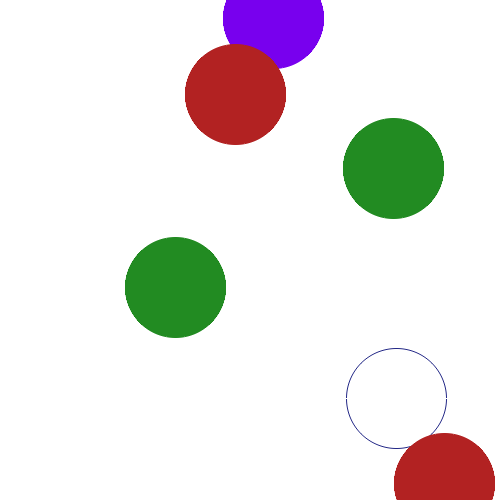

In [27]:
            
# The example of visualizing the saved test GIFs
from IPython.display import display, Image

# Display the GIF in Jupyter
display(Image(filename="results/SandingEnvMiddle/ppo/video/test/_seed_0_ep_0.gif"))  # Change the file path to display yours

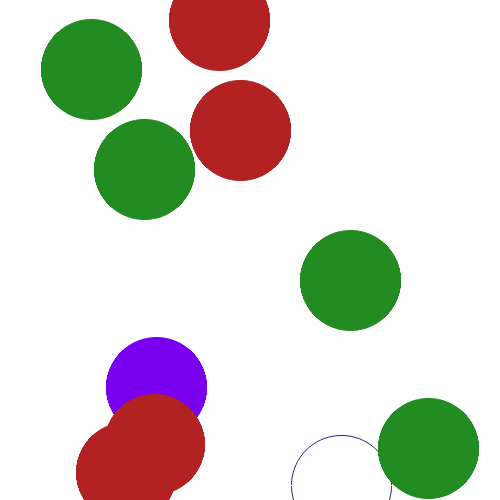

In [28]:
display(Image(filename="results/SandingEnvDifficult/ppo/video/test/_seed_1_ep_0.gif"))  # Change the file path to display yours

In [29]:
from IPython.display import Video # to display videos
Video(Path().cwd()/'results/SandingEnvDifficult/ppo/video/train/project-episode-9000.mp4', embed=True)

## Task 1.3: Plot the algorithm's performance in each environment

If all above code runs successfully, now we want to make a plot of the algorithm's training performance. You can run the code below to make plots. The training performance will look similar to this:

<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ppo_statistical_SandingEnvEasy.png" alt="PPO Easy Environment" width="240"/>
    <figcaption>PPO Easy</figcaption>
  </figure>
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ppo_statistical_SandingEnvMiddle.png" alt="PPO Middle Environment" width="240"/>
    <figcaption>PPO Middle</figcaption>
  </figure>
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ppo_statistical_SandingEnvDifficult.png" alt="PPO Difficult Environment" width="240"/>
    <figcaption>PPO Difficult</figcaption>
  </figure>
</p>
<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ddpg_statistical_SandingEnvEasy.png" alt="DDPG Easy Environment" width="240"/>
    <figcaption>DDPG Easy</figcaption>
  </figure>
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ddpg_statistical_SandingEnvMiddle.png" alt="DDPG Middle Environment" width="240"/>
    <figcaption>DDPG Middle</figcaption>
  </figure>
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/ddpg_statistical_SandingEnvDifficult.png" alt="DDPG Difficult Environment" width="240"/>
    <figcaption>DDPG Difficult</figcaption>
  </figure>
</p>

**Note**: You do not need to make the plots look exactly the same as shown above.  The following code generates 3 figures (1 algorithm x 3 environments). Please comment below the algorithm you did not implement.

### Paths:
Your plot should be plotted in the following paths if the code runs successfully:

- **PPO Easy**: 
  - `results/SandingEnvMiddle/PPO/logging/figure_statistical_SandingEnvEasy.pdf`
- **PPO Middle**: 
  - `results/SandingEnvMiddle/PPO/logging/figure_statistical_SandingEnvMiddle.pdf`
- **PPO Difficult**: 
  - `results/SandingEnvMiddle/PPO/logging/figure_statistical_SandingEnvDifficult.pdf`
 
 or
 
- **DDPG Easy**: 
  - `results/SandingEnvMiddle/DDPG/logging/figure_statistical_SandingEnvEasy.pdf`
- **DDPG Middle**: 
  - `results/SandingEnvMiddle/DDPG/logging/figure_statistical_SandingEnvMiddle.pdf`
- **DDPG Difficult**: 
  - `results/SandingEnvMiddle/DDPG/logging/figure_statistical_SandingEnvDifficult.pdf`


action_space_dim=2 , observation_space_dim=6
action_space_dim=2 , observation_space_dim=6
action_space_dim=2 , observation_space_dim=6
action_space_dim=2 , observation_space_dim=10
action_space_dim=2 , observation_space_dim=10
action_space_dim=2 , observation_space_dim=10
action_space_dim=2 , observation_space_dim=18
action_space_dim=2 , observation_space_dim=18
action_space_dim=2 , observation_space_dim=18


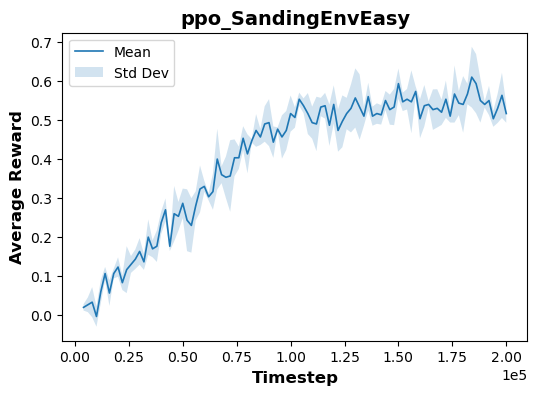

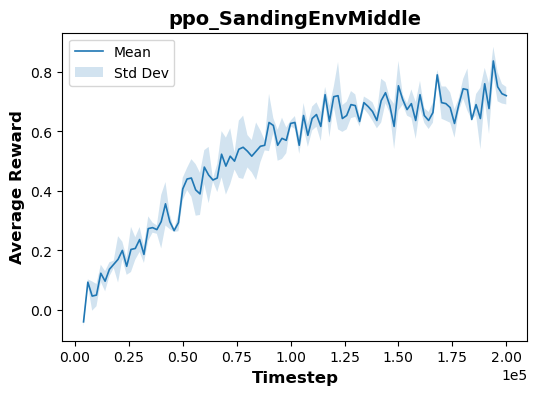

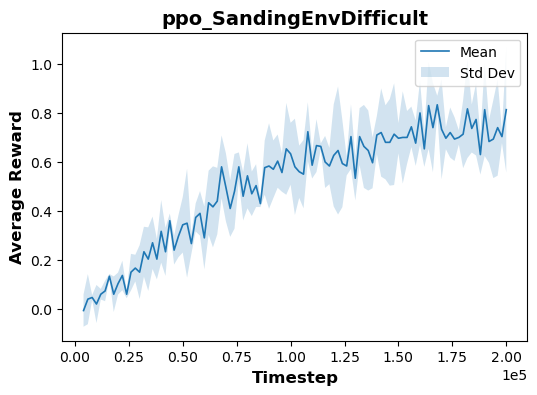

In [30]:
## Run the following code to plot PPO or DDPG's training performances
import warnings
warnings.filterwarnings('ignore')

# Uncomment the algorithm you chose 
implemented_algo ='ppo' # 'ppo' or 'ddpg'


# Loop over the three difficulty levels
for environment in ['easy', 'middle', 'difficult']:

    training_seeds = []
    for i in range(3):
        config=setup(algo=implemented_algo, env=environment, render=False)

        config["seed"] = i
        training_seeds.append(i)


        if config["args"].algo_name == 'ppo':
            agent=PPOAgent(config)
        elif config["args"].algo_name == 'ddpg':
            agent=DDPGAgent(config)
        else:
            raise Exception('Please use ppo or ddpg!')

    # plot the statistical training curves with specific random seeds
    cu.plot_algorithm_training(agent.logging_dir, training_seeds, agent.env_name, implemented_algo)


DOUBLE CLICK HERE TO EDIT, RUN the above code to make training plots for each algorithm

<a id='T2'></a>
<div class="alert alert-warning">
    <h3><b>Student Task 2</b> (40 points)</h3>
    Your objective in this task is to enhance the performance of the DDPG/PPO algorithms, taking inspiration from the suggestions provided in Section 5.II. Carefully read the extension guidelines outlined in Section 5.II, and proceed to modify either 'ddpg_extension.py' or 'ppo_extension.py' located in the 'algos' folder. 

    1. You must elevate the base algorithm's performance to ensure the agent's success in the moderate difficulty environment (environment = 'middle'). 
    
    2. Please document your results here, including the training plots and test performance.
    
    3. Adhere to the given structure to facilitate testing with 'setup' and 'test'  function.
    
    4. If you choose PPO, implement 2 extensions. If you opt for DDPG, implement at least 1 extension.
    
    5. In cases where multiple extensions are implemented, conduct a thorough analysis to discern the performance variations between the different extensions.
</div>


## Task 2.1: Enhance Your Chosen Algorithm

### a) Overview
Improve the performance of your selected reinforcement learning algorithm. Ensure that your implementations are properly documented and organized for clarity.

### b) Implementation Details
- **Algorithm Improvements**: Enhance your chosen algorithm.
  - For PPO, implement **at least two extensions**.
  - For DDPG, implement **at least one extension**.
  - Ensure that the performance is noticeably improved.
  - Place your implementations in the appropriate file:
    - 'algo/ddpg_extension.py' for DDPG
    - 'algo/ppo_extension.py' for PPO

### c) Training
- **Random Seeds**: Train your algorithm using three distinct random seeds [0,1,2] to ensure robustness and repeatability.

### d) Evaluation
- **Environment**: Evaluate your algorithm exclusively in the **middle-level difficulty environment** to focus your improvements.

### e) Code Compatibility
- Ensure that your code is **fully compatible** with all existing functions in other files, maintaining the integrity of the overall project structure.

---



**Train**: After implementing the improvement extensions, run the following code to train your agents.

In [ ]:
# Implement your improved algorithm either in algo/ddpg_extension.py or algo/ppo_extension.py
from algos.ddpg_extension import DDPGExtension
from algos.ppo_extension import PPOExtension

implemented_algo = ''# choose 'ppo_extension' or 'ddpg_extension'
environment = 'middle'

training_seeds = []
for i in range(3):
    config=setup(algo=implemented_algo, env=environment)

    config["seed"] = i
    training_seeds.append(i)


    if config["args"].algo_name == 'ppo_extension':
        agent=PPOExtension(config)
    elif config["args"].algo_name == 'ddpg_extension':
        agent=DDPGExtension(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    # Train the agent using selected algorithm    
    agent.train()


**Test**: After training, run the following code to test your agents.

In [ ]:
training_seeds = []
for i in range(3):
    config=setup(algo=implemented_algo, env=environment)

    config["seed"] = i
    training_seeds.append(i)


    if config["args"].algo_name == 'ppo_extension':
        agent=PPOExtension(config)
    elif config["args"].algo_name == 'ddpg_extension':
        agent=DDPGExtension(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    # Test the agent in the selected environment
    test(agent, environment, implemented_algo)


**Write your answers here**:


   
- PPO_extension_Middle_environment:
    - mean:
    - standard deviation:

 or 
 
 
- DDPG_extension_Middle_environment:
    - mean:
    - standard deviation:
 
 ---

## Task 2.2: Plot improved algorithm performance 

### a) Display the plots:
Display the training performance of your improved algorithm, similarly as in task 1.3

### b) Paths:
Your plot should be plotted in the following paths if the code runs successfully:

- **improved Middle**: 
  - `results/SandingEnvMiddle/ppo_extension(or ddpg_extension)/logging/figure_statistical_SandingEnvMiddle.pdf`



In [ ]:
## Run the following code to plot PPO or DDPG's training performances
import warnings
warnings.filterwarnings('ignore')

# Uncomment the algorithm you chose 
implemented_algo =# 'ppo_extension' or 'ddpg_extension'
environment = 'middle'

# Loop over the three difficulty levels

training_seeds = [0,1,2]

config=setup(algo=implemented_algo, env=environment, render=False)

config["seed"] = 0

agent=# DDPGExtension(config) or PPOExtension(config)

# plot the statistical training curves with specific random seeds
cu.plot_algorithm_training(agent.logging_dir, training_seeds, agent.env_name, implemented_algo)


## Task 2.3: Comparison of Improved and Original Algorithm Performance

### a) Display the Plots
Display the training performance of both the improved and the original algorithms.

We aim to compare the training performances of the original and improved algorithms. To achieve this, we will generate the following plots, which will highlight the sample efficiency and the agent's performance throughout the training process. Below are some figures comparing the performances of DDPG and PPO:

<p align="center">
  <figure style="display: inline-block; text-align: center; margin: 10px;">
    <img src="imgs/middle_compare_ddpg_ppo.png" alt="PPO Middle Environment" width="540"/>
    <figcaption>PPO vs DDPG (Middle environment)</figcaption>
  </figure>
  
</p>

**Note**: The display does not need to exactly match the figures shown above. However, the code should generate a figure to compare the original algorithm with the improved algorithm.

### b) Paths
If the code runs successfully, your plot should be saved to the following paths:

- **Original vs Improved (Middle Environment)**: 
  - `results/SandingEnvMiddle/compare_ddpg_ddpg_extension.pdf`
  - or 
  - `results/SandingEnvMiddle/compare_ppo_ppo_extension.pdf`


In [ ]:
## Run the following code to draw the comparison plots of PPO and DDPG's training performances
import warnings
warnings.filterwarnings('ignore')

environment = 'middle'

orgin_alo_name = # 'ddpg' or 'ppo'
improved_alo_name = # 'ddpg_extension' or 'ppo_extension'

config=setup(algo=orgin_alo_name, env=environment, render=False)
origin_agent = # DDPGAgent(config) or PPOAgent(config)

config=setup(algo=improved_alo_name, env=environment, render=False)
improved_agent = # DDPGExtension(config) or PPOExtension(config)

# make the comparison plot
cu.compare_algorithm_training(origin_agent, improved_agent, seeds=[0,1,2])

<a id='Q1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1</b> (30 points) </h3> 
    Explain how you extended PPO/DDPG and why in a maximum of 200 words. In addition, explain briefly in which parts of the source code the changes are (refer to file name and function names or lines of code).
</div>

DOUBLE CLICK HERE TO EDIT, CLEAR THIS TEXT AND ANSWER HERE

<a id='T3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 3</b> (+20 points) </h3>
    This task give bonus points to the project works that get highest performance in the difficult environment. At the end of the course, we will use everyone's improved agent (please submit your pretrained weights) to run the competition on the most difficult sanding environment. Competitive grading: all projects are evaluated in the difficult environment for performance and put into ranking order. Top 10% of submitted projects get bonus points. Best performing project (100% ranked) gets 20 bonus points, 95% ranked gets 10 bonus points, 90% or lower ranked get 0 bonus points.
</div>

## Task 3.1: Evaluate Your Improved Algorithm with difficult environment


### a) Training
- **Random Seeds**: Train your algorithm using three distinct random seeds [0,1,2] to ensure robustness and repeatability.

### b) Evaluation
- **Environment**: Evaluate your algorithm exclusively in the **difficult-level difficulty environment** to focus your improvements.

### c) Code Compatibility
- Ensure that your code is **fully compatible** with all existing functions in other files, maintaining the integrity of the overall project structure.

---



In [ ]:

from algos.ddpg_agent import DDPGAgent
from algos.ppo_agent import PPOAgent
from algos.ddpg_extension import DDPGExtension
from algos.ppo_extension import PPOExtension
# implement your improved algorithm either in algo/ddpg_extension.py or algo/ppo_extension.py

implemented_algo = ''# choose 'ppo_extension' or 'ddpg_extension'
environment = 'difficult'


training_seeds = []
for i in range(3):
    config=setup(algo=implemented_algo, env=environment)

    config["seed"] = i
    training_seeds.append(i)


    if config["args"].algo_name == 'ppo':
        agent=PPOAgent(config)
    elif config["args"].algo_name == 'ddpg':
        agent=DDPGAgent(config)
    elif config["args"].algo_name == 'ppo_extension':
        agent=PPOExtension(config)
    elif config["args"].algo_name == 'ddpg_extension':
        agent=DDPGExtension(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    # Train the agent using selected algorithm    
    agent.train()

  

**Test**: After training, run the following code to test your agents.

In [ ]:
training_seeds = []
for i in range(3):
    config=setup(algo=implemented_algo, env=environment)

    config["seed"] = i
    training_seeds.append(i)


    if config["args"].algo_name == 'ppo_extension':
        agent=PPOExtension(config)
    elif config["args"].algo_name == 'ddpg_extension':
        agent=DDPGExtension(config)
    else:
        raise Exception('Please use ppo or ddpg!')

    # Test the agent in the selected environment
    test(agent, environment, implemented_algo)


**Write your answers here**:


   
- PPO_extension_Difficult_environment:
    - mean:
    - standard deviation:

 or 
 
 
- DDPG_extension_Difficult_environment:
    - mean:
    - standard deviation:
 
 ---

## Task 3.2: Plot the Improved Algorithm's Performance 

#### Display the Plots
Display the training performance of your improved algorithm, similar to what was done in Task 2.2.

#### Paths
If the code runs successfully, your plot should be saved to the following paths:

- **Improved Difficult**: 
  - `results/SandingEnvDifficult/ppo_extension/logging/figure_statistical_SandingEnvDifficult.pdf`
  
  or
  
  - `results/SandingEnvDifficult/ddpg_extension/logging/figure_statistical_SandingEnvDifficult.pdf`


In [ ]:
## Run the following code to plot PPO or DDPG's training performances
import warnings
warnings.filterwarnings('ignore')

# Uncomment the algorithm you chose 
implemented_algo =# 'ppo_extension' or 'ddpg_extension'
environment = 'difficult'

# Loop over the three difficulty levels

training_seeds = [0,1,2]

config=setup(algo=implemented_algo, env=environment, render=False)

config["seed"] = 0

agent=# DDPGExtension(config) or PPOExtension(config)

# plot the statistical training curves with specific random seeds
cu.plot_algorithm_training(agent.logging_dir, training_seeds, agent.env_name, implemented_algo)


## Task 3.3: Plot improved algorithm's and original's comparison performance

### Display the plots:
Display the training performance of your improvement algorithm, similarly as in task 2.3

### Paths:
Your plot should be plotted in the following paths if the code runs successfully:

- **Original vs Improved (difficult environment)**: 
  - `results/SandingEnvDifficult/compare_ddpg_ddpg_extension.pdf`
  - or 
  - `results/SandingEnvDifficult/compare_ppo_ppo_extension.pdf`
  

In [ ]:
## Run the following code to draw the comparison plots of PPO and DDPG's training performances
import warnings
warnings.filterwarnings('ignore')

environment = 'difficult'

orgin_alo_name = # 'ddpg' or 'ppo'
improved_alo_name = # 'ddpg_extension' or 'ppo_extension'

config=setup(algo=orgin_alo_name, env=environment, render=False)
origin_agent = # DDPGAgent(config) or PPOAgent(config)

config=setup(algo=improved_alo_name, env=environment, render=False)
improved_agent = # DDPGExtension(config) or PPOExtension(config)

# make the comparison plot
cu.compare_algorithm_training(origin_agent, improved_agent, seeds=[0,1,2])

 ---
## Submitting <a id='9'></a>
Ensure that all tasks and questions are answered, and that the necessary plots are saved in the appropriate locations. Below is a list of the relevant plots and files that need to be submitted for the project work:

### 1. Model Weights
For each algorithm, you should have saved three model weights in the corresponding paths:

`'results/(environment name)/(algorithm name)/model/model_parameters_(seed number).pt'`

**Examples:**
- For a DDPG agent trained with seed number 0 in the middle-level sanding environment:
  - `'results/SandingEnvMiddle/ddpg/model/model_parameters_0.pt'`

**Submission Checklist:**
Ensure that each algorithm (ddpg, ppo, ddpg_extension, ppo_extension) has three sets of model weights (model_parameters_0, model_parameters_1, model_parameters_2) saved in the above paths.

### 2. Individual Algorithm Plots

You need to check that you have plotted the average training performances and the comparison plots for each algorithm. For submission, ensure the following figures are included:

#### Task 1.3:

- **PPO Easy**: 
  - `results/SandingEnvMiddle/PPO/logging/figure_statistical_SandingEnvEasy.pdf`
- **PPO Middle**: 
  - `results/SandingEnvMiddle/PPO/logging/figure_statistical_SandingEnvMiddle.pdf`
- **PPO Difficult**: 
  - `results/SandingEnvMiddle/PPO/logging/figure_statistical_SandingEnvDifficult.pdf`
  
  or
  
  
- **DDPG Easy**: 
  - `results/SandingEnvMiddle/DDPG/logging/figure_statistical_SandingEnvEasy.pdf`
- **DDPG Middle**: 
  - `results/SandingEnvMiddle/DDPG/logging/figure_statistical_SandingEnvMiddle.pdf`
- **DDPG Difficult**: 
  - `results/SandingEnvMiddle/DDPG/logging/figure_statistical_SandingEnvDifficult.pdf`


#### Task 2.3:

- **Improved agent for Middle-level environment**: 
  - `results/SandingEnvMiddle/ppo_extension(or ddpg_extension)/logging/figure_statistical_SandingEnvMiddle.pdf`

#### Task 2.4:

- **Original vs Improved (Middle-level Environment)**: 
  - `results/SandingEnvMiddle/compare_ddpg_ddpg_extension.pdf`
  - or 
  - `results/SandingEnvMiddle/compare_ppo_ppo_extension.pdf`
  
#### Task 3.3:

- **Improved Difficult-level environment**: 
  - `results/SandingEnvDifficult/ppo_extension(or ddpg_extension)/logging/figure_statistical_SandingEnvMiddle.pdf`

#### Task 3.4:

- **Original vs Improved (Difficult-level Environment)**: 
  - `results/SandingEnvDifficult/compare_ddpg_ddpg_extension.pdf`
  - or 
  - `results/SandingEnvDifficult/compare_ppo_ppo_extension.pdf`


## 10. Feedback <a id='10'></a>

In order to help the staff of the course as well as the forthcoming students, it would be great if you could answer the following questions in your submission:

1) How much time did the project work members in total spend on the project work? (change the ```hrs``` variable below to a floating point number representing the number of hours taken e.g. 35.43)

In [ ]:
hrs = None

2) Difficulty of each task/question from 1-5 (int or float)

In [ ]:
T1 = None   # Implementing PPO or DDPG for the sanding task (35 points)
T2 = None   # Extending PPO/DDPG to work on the easy and moderate difficulty tasks (45 points)
T3 = None   # Extending PPO/DDPG to work on the difficult task (+20 points)
Q1 = None   # Question 1 How did you extend PPO/DDPG and why? (20 points)

3) How well did you understand the content of the task/question from 1-5? (int or float)

In [ ]:
T1 = None   # Implementing PPO or DDPG for the sanding task (35 points)
T2 = None   # Extending PPO/DDPG to work on the easy and moderate difficulty tasks (45 points)
T3 = None   # Extending PPO/DDPG to work on the difficult task (+20 points)
Q1 = None   # Question 1 How did you extend PPO/DDPG and why? (20 points)

4) General feedback. Consider questions like:

    - How difficult / time consuming was the project work? What was the most difficult part?
    - What should be changed in the project work?
    - What was the most useful / interesting part in the project work?
    
Please share any additional feedback, suggestions, or comments you have about the lecture, assignment, or course content. Your input is valuable in helping us improve the learning experience.

DOUBLE CLICK HERE TO EDIT, CLEAR THIS TEXT AND ANSWER HERE